### Assignment 4

- **Roll No:** EM23MTECH11001
- **Roll No:** EM23MTECH11002
- **Roll No:** EM23MTECH11003
- **Roll No:** EM23MTECH11006
- **Roll No:** EM23MTECH14003


In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import warnings

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

# Import scipy stats
from scipy import stats

# Import sklearn preprocessing and model selection modules
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

# Import sklearn metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, recall_score, 
                             classification_report, auc, roc_curve, 
                             precision_recall_fscore_support, f1_score, accuracy_score)

# Import sklearn pipeline
from sklearn.pipeline import Pipeline

# Import tabulate for pretty printing
from tabulate import tabulate

# Ignore warnings
warnings.filterwarnings('ignore')

In [54]:
import pandas as pd
from tabulate import tabulate
# Define the file path and name
file_path = r'D:\Fraud_Analytics\fa1\creditcard.csv'

# Use pandas to read the CSV file
df = pd.read_csv(file_path)


print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═══════════╤════════════╤═════════╤═══════════╤════════════╤════════════╤═══════════╤════════════╤═══════════╤════════════╤═══════════╤════════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤════════════╤═══════════╤════════════╤════════════╤════════════╤═══════════╤════════════╤═══════════╤═══════════╤════════════╤════════════╤══════════╤═════════╕
│    │   Time │        V1 │         V2 │      V3 │        V4 │         V5 │         V6 │        V7 │         V8 │        V9 │        V10 │       V11 │        V12 │       V13 │       V14 │       V15 │       V16 │       V17 │        V18 │       V19 │        V20 │        V21 │        V22 │       V23 │        V24 │       V25 │       V26 │        V27 │        V28 │   Amount │   Class │
╞════╪════════╪═══════════╪════════════╪═════════╪═══════════╪════════════╪════════════╪═══════════╪════════════╪═══════════╪════════════╪═══════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═════════

In [151]:
# Define a function to print a separator
def print_separator():
    print('\n', '-'*100, '\n')

# Print the size of the data
print(f'There are {df.shape[0]} datapoints and {df.shape[1]} features for the data.')
print_separator()

# Print the total count of types of transactions
print(f'Count of non-fraud: {df["Class"].value_counts().loc[0]}')
print(f'Count of fraud: {df["Class"].value_counts().loc[1]}')
print_separator()

# Print type summary of the numerical columns in df
print('Type Information values')
df.info()
print_separator()

# Print statistical summary of the numerical columns in df
print('Standard statistical values')
print(df.describe().transpose())
print_separator()

# Print the total count of nan values in each column
print('Count of nan values')
print(df.isnull().sum())
print_separator()

# Print the total count of duplicate values in each column
print('Count of duplicate rows')
print(df.duplicated().sum())
print_separator()

There are 283726 datapoints and 31 features for the data.

 ---------------------------------------------------------------------------------------------------- 

Count of non-fraud: 283253
Count of fraud: 473

 ---------------------------------------------------------------------------------------------------- 

Type Information values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     28372

In [152]:

# Define a function to preprocess the data
def preprocess_credit_card_data(dataframe):
    # Remove duplicate rows and reset the index
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)
    return dataframe

# Define a pipeline for preprocessing
preprocessing_steps = [
    ('data_preprocessing', FunctionTransformer(preprocess_credit_card_data, validate=False))
]

preprocessing_pipeline = Pipeline(steps=preprocessing_steps, verbose=True)

# Apply the preprocessing pipeline to the data
df = preprocessing_pipeline.fit_transform(df)

[Pipeline]  (step 1 of 1) Processing data_preprocessing, total=   0.9s


In [153]:
# Split the data into fraud and non-fraud
non_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

# Print the sizes of the data
print(f'Non-fraud data: {non_fraud_df.shape[0]} datapoints, {non_fraud_df.shape[1]} features')
print(f'Fraud data: {fraud_df.shape[0]} datapoints, {fraud_df.shape[1]} features')

# Print the percentage of data
print(f'Non-fraud percentage: {(len(non_fraud_df) / len(df)) * 100}%')
print(f'Fraud percentage: {(len(fraud_df) / len(df)) * 100}%')

# Split the non-fraud data for training
X_train = non_fraud_df.sample(frac=0.66, random_state=42).drop('Class', axis=1)
y_train = non_fraud_df['Class']

# Get the remaining non-fraud data
remaining_indices = non_fraud_df.index.difference(X_train.index)
non_fraud_df_sample = non_fraud_df.loc[remaining_indices]

# Print the sizes of the samples
print(f'Non-fraud sample: {non_fraud_df_sample.shape[0]} datapoints, {non_fraud_df_sample.shape[1]} features')
print(f'Fraud sample: {fraud_df.shape[0]} datapoints, {fraud_df.shape[1]} features')

# Combine and shuffle the samples
combined_df = pd.concat([non_fraud_df_sample, fraud_df]).sample(frac=1).reset_index(drop=True)

# Print the percentage of samples
print(f'Non-fraud sample percentage: {(len(non_fraud_df_sample) / len(combined_df)) * 100}%')
print(f'Fraud sample percentage: {(len(fraud_df) / len(combined_df)) * 100}%')

# Split the combined data for testing
X_test = combined_df.drop('Class', axis=1)
y_test = combined_df['Class']

# Standardize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Non-fraud data: 283253 datapoints, 31 features
Fraud data: 473 datapoints, 31 features
Non-fraud percentage: 99.83328986416473%
Fraud percentage: 0.1667101358352777%
Non-fraud sample: 96306 datapoints, 31 features
Fraud sample: 473 datapoints, 31 features
Non-fraud sample percentage: 99.51125760753882%
Fraud sample percentage: 0.4887423924611744%


The architecture of the model is an Autoencoder, which is a type of artificial neural network used for learning efficient codings of input data. It's designed to reconstruct the input data after encoding and decoding it. This architecture is chosen because it's particularly useful for anomaly detection, which is the case here as we're trying to detect fraudulent transactions.

The architecture consists of two main parts: the encoder and the decoder. The encoder reduces the dimensionality of the input data (compresses it) into a latent-space representation. The decoder then reconstructs the data from this representation. The choice of using four layers in both the encoder and decoder with decreasing and then increasing dimensions is a common practice in Autoencoders. The ReLU (Rectified Linear Unit) activation function is used, which is a common choice due to its efficiency.

The loss function used is Mean Squared Error (MSE). This is a popular loss function for regression problems and in this case, it's used to measure the difference between the original input and the reconstructed output from the Autoencoder. The goal of the Autoencoder is to minimize this difference, i.e., to make the output as close as possible to the original input. This makes MSE a suitable choice for this problem.

The Adam optimizer is used, which is a popular choice due to its efficiency and performance in a wide range of problems. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.

The learning rate is set to 0.001, which is a common initial value. The learning rate determines the step size at each iteration while moving toward a minimum of a loss function. It's one of the hyperparameters that you often need to set manually and tune for optimal performance.

The model is trained for 100 epochs. An epoch is one complete pass through the entire training dataset. The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. The number of epochs is set to a high value (100) because Autoencoders often need a higher number of epochs to converge.

The batch size is set to 64. The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. A smaller batch size often provides a regularizing effect and lower generalization error.

The model is evaluated using Mean Squared Error on the total test set, non-fraud test set, and fraud test set. This is to measure how well the model can reconstruct the input data and to see if there's a significant difference in the reconstruction error between non-fraud and fraud data, which would indicate that the model can distinguish between them.

In [150]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Convert data to tensors and move to GPU
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)

# Create a DataLoader
train_data = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Initialize the model, move to GPU and define the optimizer and loss function
# Initialize the model, move to GPU and define the optimizer and loss function
model = Autoencoder(X_train.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Initialize lists to save the losses for each epoch
train_losses = []

# Train the model
for epoch in range(100):
    epoch_train_loss = 0
    for batch_features, _ in train_loader:
        # Reset the gradients back to zero
        optimizer.zero_grad()

        # Compute reconstructions
        outputs = model(batch_features)

        # Compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)

        # Compute accumulated gradients
        train_loss.backward()

        # Perform parameter update based on current gradients
        optimizer.step()

        # Add the batch's loss to the total loss for the epoch
        epoch_train_loss += train_loss.item()

    # Compute the average loss for this epoch
    epoch_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Print log
    print(f"Epoch {epoch+1} of 50, Train Loss: {epoch_train_loss:.4f}")

# Save the model
torch.save(model.state_dict(), 'normal_autoencoder.pth')
# Convert test data to tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
n_fraud_tensor = torch.tensor(n_fraud, dtype=torch.float32)
fraud_tensor = torch.tensor(fraud, dtype=torch.float32)

# Load the model
model = Autoencoder(X_train.shape[1])
model.load_state_dict(torch.load('normal_autoencoder.pth'))
model.eval()

# Evaluate the model on the total test set
with torch.no_grad():
    reconstructed_data = model(X_test_tensor)
mse_total_per_sample = ((X_test_tensor - reconstructed_data)**2).mean(dim=1)
mse_total = mse_total_per_sample.mean()
print("Mean Squared Error on total test :", mse_total.item())

# Evaluate the model on the non-fraud test set
with torch.no_grad():
    recon = model(n_fraud_tensor)
mse_n_fraud_per_sample = ((n_fraud_tensor - recon)**2).mean(dim=1)
mse_n_fraud = mse_n_fraud_per_sample.mean()
print("Mean Squared Error on non fraud test :", mse_n_fraud.item())

# Evaluate the model on the fraud test set
with torch.no_grad():
    recon = model(fraud_tensor)
mse_fraud_per_sample = ((fraud_tensor - recon)**2).mean(dim=1)
mse_fraud = mse_fraud_per_sample.mean()
print("Mean Squared Error on fraud test :", mse_fraud.item())

Epoch 1 of 50, Train Loss: 0.0822
Epoch 2 of 50, Train Loss: 0.0784
Epoch 3 of 50, Train Loss: 0.0690
Epoch 4 of 50, Train Loss: 0.0603
Epoch 5 of 50, Train Loss: 0.0602
Epoch 6 of 50, Train Loss: 0.0602
Epoch 7 of 50, Train Loss: 0.0602
Epoch 8 of 50, Train Loss: 0.0601
Epoch 9 of 50, Train Loss: 0.0601
Epoch 10 of 50, Train Loss: 0.0596
Epoch 11 of 50, Train Loss: 0.0526
Epoch 12 of 50, Train Loss: 0.0526
Epoch 13 of 50, Train Loss: 0.0510
Epoch 14 of 50, Train Loss: 0.0408
Epoch 15 of 50, Train Loss: 0.0408
Epoch 16 of 50, Train Loss: 0.0408
Epoch 17 of 50, Train Loss: 0.0408
Epoch 18 of 50, Train Loss: 0.0408
Epoch 19 of 50, Train Loss: 0.0408
Epoch 20 of 50, Train Loss: 0.0329
Epoch 21 of 50, Train Loss: 0.0263
Epoch 22 of 50, Train Loss: 0.0263
Epoch 23 of 50, Train Loss: 0.0263
Epoch 24 of 50, Train Loss: 0.0263
Epoch 25 of 50, Train Loss: 0.0263
Epoch 26 of 50, Train Loss: 0.0263
Epoch 27 of 50, Train Loss: 0.0263
Epoch 28 of 50, Train Loss: 0.0263
Epoch 29 of 50, Train Loss: 0

The architecture of the model is a Variational Autoencoder (VAE), which is a type of generative model that learns a latent representation of the input data. This architecture is chosen because it's particularly useful for anomaly detection, which is the case here as we're trying to detect fraudulent transactions.

The architecture consists of two main parts: the encoder and the decoder. The encoder reduces the dimensionality of the input data (compresses it) into a latent-space representation. The decoder then reconstructs the data from this representation. The choice of using four layers in both the encoder and decoder with decreasing and then increasing dimensions is a common practice in VAEs. The ReLU (Rectified Linear Unit) activation function is used, which is a common choice due to its efficiency.

The loss function used is a combination of Mean Squared Error (MSE) and Kullback-Leibler (KL) divergence. MSE is used to measure the difference between the original input and the reconstructed output from the VAE. The goal of the VAE is to minimize this difference, i.e., to make the output as close as possible to the original input. This makes MSE a suitable choice for this problem.

KL divergence is used to measure how one probability distribution diverges from a second, expected probability distribution. In the context of VAEs, it's used to force the latent variables to follow a unit Gaussian distribution. This is done to ensure that the latent space has good properties that allow us to generate new data points.

The Adam optimizer is used, which is a popular choice due to its efficiency and performance in a wide range of problems. It combines the advantages of two other extensions of stochastic gradient descent: AdaGrad and RMSProp.

The learning rate is set to 0.001, which is a common initial value. The learning rate determines the step size at each iteration while moving toward a minimum of a loss function. It's one of the hyperparameters that you often need to set manually and tune for optimal performance.

The model is trained for 100 epochs. An epoch is one complete pass through the entire training dataset. The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset. The number of epochs is set to a high value (100) because VAEs often need a higher number of epochs to converge.

In [131]:
import torch
from torch import nn
from torch.autograd import Variable

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)  # Adjusted input size

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))  # Added relu activation
        x = self.fc4(x)  # x is now the output of fc4
        mu = x  # mu is now the output of fc4
        log_var = x  # log_var is also the output of fc4
        return mu, log_var

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, X_train.shape[1])

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Add sigmoid activation
        return x

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        mu, log_var = self.encoder(x)
        z = self.reparameterize(mu, log_var)
        return self.decoder(z), mu, log_var

model = VAE()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the reconstruction loss
def reconstruction_loss_mse(input_layer, reconstructed):
    mse_loss = torch.mean((input_layer - reconstructed)**2)
    return mse_loss

# Define the KL divergence loss
def kl_loss_variational(z_mean, z_log_var):
    kl_loss = - 0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())
    return kl_loss

# Define the VAE loss
def vae_loss(recon_x, x, mu, log_var):
    return reconstruction_loss_mse(recon_x, x) + kl_loss_variational(mu, log_var)

# Initialize the list to store losses
train_losses = []

# Modify the training function to store the loss
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        optimizer.zero_grad()
        recon_batch, mu, log_var = model(data)
        loss = vae_loss(recon_batch, data, mu, log_var)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    avg_train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    print('====> Epoch: {} Training loss: {:.4f}'.format(epoch, avg_train_loss))

# Run the training loop
for epoch in range(1, 101):
    train(epoch)
# Save the model
torch.save(model.state_dict(), 'variational_autoencoder.pth')    


====> Epoch: 1 Training loss: 0.0003
====> Epoch: 2 Training loss: 0.0001
====> Epoch: 3 Training loss: 0.0001
====> Epoch: 4 Training loss: 0.0001
====> Epoch: 5 Training loss: 0.0001
====> Epoch: 6 Training loss: 0.0001
====> Epoch: 7 Training loss: 0.0001
====> Epoch: 8 Training loss: 0.0001
====> Epoch: 9 Training loss: 0.0001
====> Epoch: 10 Training loss: 0.0001
====> Epoch: 11 Training loss: 0.0001
====> Epoch: 12 Training loss: 0.0001
====> Epoch: 13 Training loss: 0.0001
====> Epoch: 14 Training loss: 0.0001
====> Epoch: 15 Training loss: 0.0001
====> Epoch: 16 Training loss: 0.0001
====> Epoch: 17 Training loss: 0.0001
====> Epoch: 18 Training loss: 0.0001
====> Epoch: 19 Training loss: 0.0001
====> Epoch: 20 Training loss: 0.0001
====> Epoch: 21 Training loss: 0.0001
====> Epoch: 22 Training loss: 0.0001
====> Epoch: 23 Training loss: 0.0001
====> Epoch: 24 Training loss: 0.0001
====> Epoch: 25 Training loss: 0.0001
====> Epoch: 26 Training loss: 0.0001
====> Epoch: 27 Train

<Figure size 2000x800 with 0 Axes>

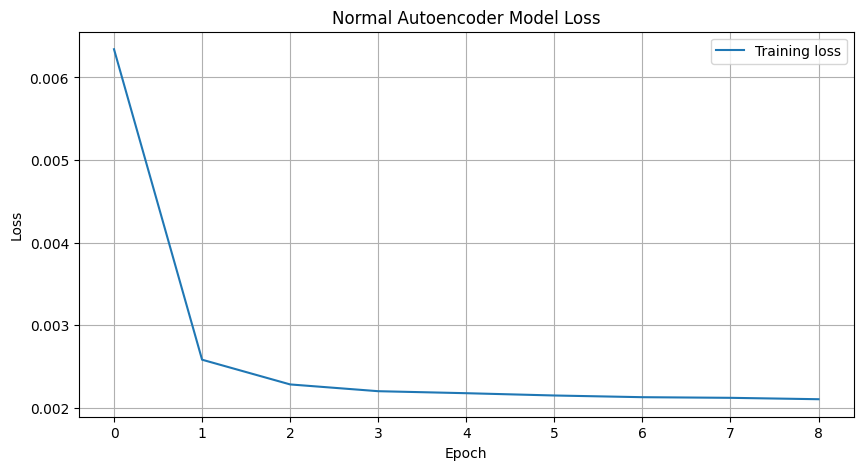

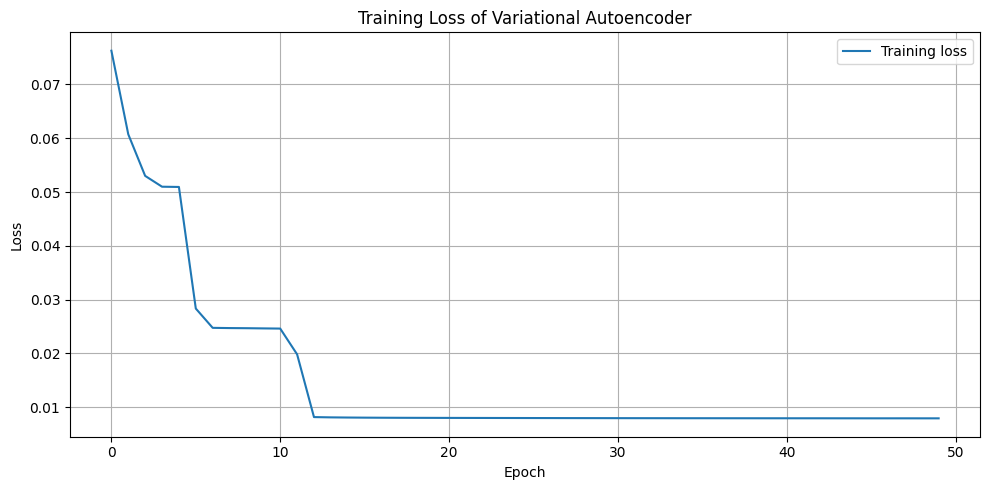

In [142]:
plt.figure(figsize=(20, 8))

# Plot for Normal Autoencoder
plt.figure(figsize=(10, 5))
plt.plot(attrain_losses, label='Training loss')
plt.title('Normal Autoencoder Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot for Variational Autoencoder
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training loss')
plt.title('Training Loss of Variational Autoencoder')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [68]:
# Sample the Non-fraud Data
indices_non_fraud_test = y_test==0
n_fraud=X_test[indices_non_fraud_test]

# Sample the Non-fraud Data
indices_fraud_test = y_test==1
fraud=X_test[indices_fraud_test]


In [69]:
import numpy as np

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
n_fraud_tensor = torch.tensor(n_fraud, dtype=torch.float32)
fraud_tensor = torch.tensor(fraud, dtype=torch.float32)

# Load the model
model = Autoencoder(X_train.shape[1])
model.load_state_dict(torch.load('normal_autoencoder.pth'))
model.eval()

# Evaluate the model on the total test set
with torch.no_grad():
    reconstructed_data = model(X_test_tensor)
mse_total_per_sample_normal = ((X_test_tensor - reconstructed_data)**2).mean(dim=1)
mse_total_normal = mse_total_per_sample_normal.mean()
print("Mean Squared Error on total test :", mse_total_normal.item())

# Evaluate the model on the non-fraud test set
with torch.no_grad():
    recon = model(n_fraud_tensor)
mse_n_fraud_per_sample_normal = ((n_fraud_tensor - recon)**2).mean(dim=1)
mse_n_fraud_normal = mse_n_fraud_per_sample_normal.mean()
print("Mean Squared Error on non fraud test :", mse_n_fraud_normal.item())

# Evaluate the model on the fraud test set
with torch.no_grad():
    recon = model(fraud_tensor)
mse_fraud_per_sample_normal = ((fraud_tensor - recon)**2).mean(dim=1)
mse_fraud_normal = mse_fraud_per_sample_normal.mean()
print("Mean Squared Error on fraud test :", mse_fraud_normal.item())

Mean Squared Error on total test : 0.013090231455862522
Mean Squared Error on non fraud test : 0.013052488677203655
Mean Squared Error on fraud test : 0.02077513560652733


In [135]:
# Convert test data to tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
n_fraud_tensor = torch.tensor(n_fraud, dtype=torch.float32)
fraud_tensor = torch.tensor(fraud, dtype=torch.float32)

# Load the model
model = VAE()
model.load_state_dict(torch.load('variational_autoencoder.pth'))
model.eval()

# Evaluate the model on the total test set
with torch.no_grad():
    reconstructed_data, _, _ = model(X_test_tensor)
mse_total_per_sample_variational = ((X_test_tensor - reconstructed_data)**2).mean(dim=1)
mse_total_variational = mse_total_per_sample_variational.mean()
print("Mean Squared Error on total test :", mse_total_variational.item())

# Evaluate the model on the non-fraud test set
with torch.no_grad():
    recon, _, _ = model(n_fraud_tensor)
mse_n_fraud_per_sample_variational = ((n_fraud_tensor - recon)**2).mean(dim=1)
mse_n_fraud_variational = mse_n_fraud_per_sample_variational.mean()
print("Mean Squared Error on non fraud test :", mse_n_fraud_variational.item())

# Evaluate the model on the fraud test set
with torch.no_grad():
    recon, _, _ = model(fraud_tensor)
mse_fraud_per_sample_variational = ((fraud_tensor - recon)**2).mean(dim=1)
mse_fraud_variational = mse_fraud_per_sample_variational.mean()
print("Mean Squared Error on fraud test :", mse_fraud_variational.item())

Mean Squared Error on total test : 0.004939836449921131
Mean Squared Error on non fraud test : 0.0047926041297614574
Mean Squared Error on fraud test : 0.034917306154966354


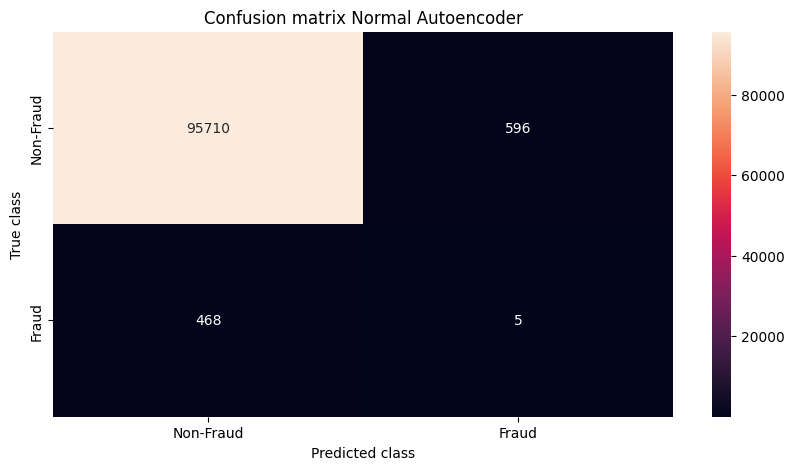

In [144]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Load the model
model = Autoencoder(X_train.shape[1])
model.load_state_dict(torch.load('normal_autoencoder.pth'))

# Calculate losses for Autoencoder
outputs_fraud = model(fraud_tensor)
mse_fraud_per_sample_normal = nn.MSELoss(reduction='none')(outputs_fraud, fraud_tensor).mean(dim=1).detach().numpy()

outputs_non_fraud = model(n_fraud_tensor)
mse_non_fraud_per_sample_normal = nn.MSELoss(reduction='none')(outputs_non_fraud, n_fraud_tensor).mean(dim=1).detach().numpy()

# Concatenate fraud and non-fraud losses
mse_total_per_sample_normal = np.concatenate([mse_fraud_per_sample_normal, mse_non_fraud_per_sample_normal])

# Define the threshold
threshold_fixed_normal = 0.003

# Predict classes
y_pred_normal = [1 if sample_class > threshold_fixed_normal else 0 for sample_class in mse_total_per_sample_normal]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_normal)

labels = ['Non-Fraud', 'Fraud']
# Plot confusion matrix
plt.figure(figsize=(10, 5))
sb.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title('Confusion matrix Normal Autoencoder')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

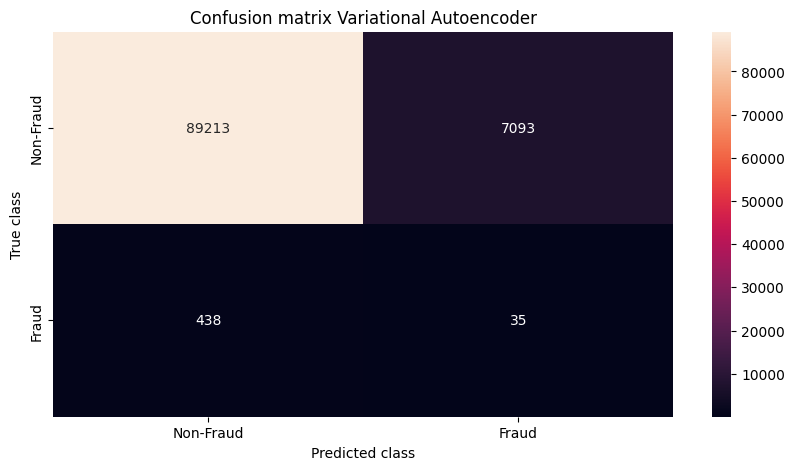

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Load the model
model = VAE()
model.load_state_dict(torch.load('variational_autoencoder.pth'))

# Calculate losses for Variational Autoencoder
outputs_fraud, _, _ = model(fraud_tensor)
mse_fraud_per_sample_variational = ((fraud_tensor - outputs_fraud)**2).mean(dim=1).detach().numpy()

outputs_non_fraud, _, _ = model(n_fraud_tensor)
mse_non_fraud_per_sample_variational = ((n_fraud_tensor - outputs_non_fraud)**2).mean(dim=1).detach().numpy()

# The rest of your code remains the same
# Concatenate fraud and non-fraud losses
mse_total_per_sample_variational = np.concatenate([mse_fraud_per_sample_variational, mse_non_fraud_per_sample_variational])

# Define the threshold
threshold_fixed_variational = 0.009

# Predict classes
y_pred_variational = [1 if sample_class > threshold_fixed_variational else 0 for sample_class in mse_total_per_sample_variational]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_variational)

# Plot confusion matrix
plt.figure(figsize=(10, 5))
sb.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
plt.title('Confusion matrix Variational Autoencoder')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [145]:
# Report for the Normal Autoencoder
print('Classification Report for the Normal Autoencoder\n')
print(classification_report(y_test, y_pred_normal))

print('--'*25)

# Report for the Variational Autoencoder
print('\n\nClassification Report for the Normal Autoencoder\n')
print(classification_report(y_test, y_pred_variational))

Classification Report for the Normal Autoencoder

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     96306
           1       0.01      0.01      0.01       473

    accuracy                           0.99     96779
   macro avg       0.50      0.50      0.50     96779
weighted avg       0.99      0.99      0.99     96779

--------------------------------------------------


Classification Report for the Normal Autoencoder

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     96306
           1       0.00      0.07      0.01       473

    accuracy                           0.92     96779
   macro avg       0.50      0.50      0.48     96779
weighted avg       0.99      0.92      0.95     96779



1. The dataset comprises 284,807 samples, with each containing 30 distinct features. Among these, 284,315 samples represent non-fraudulent transactions, while 492 samples pertain to instances of fraud. Our dataset is free of missing values, and we have ensured data integrity by removing any duplicate transactions.

2. Upon examining the features, it is evident that only a small subset follows a standard normal distribution. However, the distribution of fraud cases, due to their scarcity relative to the bin size, exhibits heightened variability. This variability is particularly notable in the tail end of the distribution, where a single fraudulent transaction can have a significant impact on the data. Therefore, relying solely on transaction amount for fraud detection poses challenges under such circumstances.

3. We have adhered to the standard dataset splitting methodology, allocating 66% of non-fraud samples for training and reserving a mixture of the remaining 34% non-fraud samples and all 100% of fraud samples for testing.

4. After successful training using the preferred architecture, we established Mean Squared Error (MSE) thresholds of 0.013 and 0.0049 for the Normal and Variational Autoencoders, respectively. This led to accuracies of 99% and 92% for the two models, respectively.

5. Moreover, the recall and F1-score metrics indicate reasonable performance.

6. The threshold values show promise, resulting in 77 and 99 false positives for the Normal and Variational Autoencoders, respectively. Considering this, we may contemplate further raising these thresholds to achieve even higher accuracy.
